In [2]:
!pip install beautifulsoup4
!pip install lxml

#Import all libraries needed
import csv
import random # library for random number generation
from sklearn.cluster import KMeans
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [145]:
# Toronto Open Data Catalogue - Neighbourhood Profiles 2016 (CSV)
# https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


In [146]:
df.head()


,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,...,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177","26,918",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,2.90%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [147]:

Neighborhood = list(df.columns.values)
Neighbourhood = Neighborhood[5:]
print(Neighbourhood)


['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills', 'Broadview North', 'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Eringate-Centennial-West Deane', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill North', 'Forest Hill South', 'Glenfield-Jane Heig

In [148]:
dfToro = pd.DataFrame(index=Neighborhood, columns=["Population_2016","Income_2016", "Neighborhood"])
dfToro.head()


,Population_2016,Income_2016,Neighborhood
Category,NaN,NaN,NaN
Topic,NaN,NaN,NaN
Data Source,NaN,NaN,NaN
Characteristic,NaN,NaN,NaN
City of Toronto,NaN,NaN,NaN


In [168]:
#  Population_2016 = Population, 2016
#  Income_2016 = Total income: Average amount ($)
for index, row in dfToro.iterrows():
    dfToro.at[index, 'Population_2016'] = df[index][2]
    dfToro.at[index, 'Income_2016'] = df[index][2264]
    dfToro.at[index, 'Neighborhood'] = df[Neighborhood]
    

dfToro.sort_values('Income_2016')



,Population_2016,Income_2016,Neighborhood
St.Andrew-Windfields,"17,812","100,516",Category \ 0 Neigh...
Edenbridge-Humber Valley,"15,535","101,551",Category \ 0 Neigh...
Lawrence Park North,"14,607","111,730",Category \ 0 Neigh...
Annex,"30,526","112,766",Category \ 0 Neigh...
Yonge-St.Clair,"12,528","114,174",Category \ 0 Neigh...
Bedford Park-Nortown,"23,236","123,077",Category \ 0 Neigh...
Leaside-Bennington,"16,828","125,564",Category \ 0 Neigh...
Kingsway South,"9,271","144,642",Category \ 0 Neigh...
Casa Loma,"10,968","165,047",Category \ 0 Neigh...
Lawrence Park South,"15,179","169,203",Category \ 0 Neigh...


In [162]:
dfToro.head()

,Population_2016,Income_2016,Neighborhood
Category,Population,Income,Category \ 0 Neigh...
Topic,Population and dwellings,Income sources,Category \ 0 Neigh...
Data Source,Census Profile 98-316-X2016001,Catalogue no. 98-400-X2016122,Category \ 0 Neigh...
Characteristic,"Population, 2016",Total income: Average amount ($),Category \ 0 Neigh...
City of Toronto,"2,731,571","52,268",Category \ 0 Neigh...


In [169]:
import matplotlib as mlp
import matplotlib.pyplot as plt

dfx=dfToro['Income_2016']
dfx.plot(kind ='box')
plt.title('Income in Toronto')
plt.show()


TypeError: Empty 'DataFrame': no numeric data to plot

In [9]:
# Download postal codes and parse it
Toronto = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
r = requests.get(Toronto)
sopa = BeautifulSoup(r.content, 'html5lib') 
table = sopa.find('div', attrs = {'id':'container'}) 
print(sopa.title)
from IPython.display import display_html
tab = str(sopa.table)
display_html(tab,raw=True)


<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [11]:
#converting into pandas data frames
dfToronto2 = pd.read_html(tab)
df=dfToronto2[0]
df.head()


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [12]:
# Dropping rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighborhoods with Postalcode
dfclean = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
dfclean.reset_index(inplace=True)

# Replacing the name of the neighborhoods from 'Not assigned' to names of Borough
dfclean['Neighbourhood'] = np.where(dfclean['Neighbourhood'] == 'Not assigned',dfclean['Borough'], dfclean['Neighbourhood'])

dfclean.head()


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [13]:
dfclean.rename(columns={'Post Code': 'Postal Code'}, inplace=True)
dfclean.head()


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [14]:
# Data frame shape
dfclean.shape


(103, 3)

In [15]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.shape


(103, 3)

In [16]:
lat_lon.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
# Merging tables Postal Code & Lat-Long

dfclean2 = pd.merge(dfclean, lat_lon, how='inner', on=None)
dfclean2.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [20]:
#Merging tables dfmerged & Income & Population
dfmerged =pd.merge(dfclean2, dfToronto, how='inner', on=None)


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [22]:
dfTorontoplot = dfmerged[dfmerged['Borough'].str.contains('Toronto',regex=False)]
dfTorontoplot


NameError: name 'dfmerged' is not defined

In [24]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(dfclean2['Latitude'],dfclean2['Longitude'],dfclean2['Borough'],dfclean2['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

In [25]:
# foursquare credentials to access their APIs
client_id = 'PEQPJEZXPG4HRTFTMTZHL3P3QRZ1SV55525PX2YO22F3Q0JB'
client_secret = 'JEDPFGTRY4SISHI1S2W3RTQGIG3UUROA5OG4I3NW4UXBBLB1'
version = '20180605'
LIMIT = 30
print('Your credentails:')
print('client_id: '+client_id)
print('client_secret: '+client_id)

Your credentails:
client_id: PEQPJEZXPG4HRTFTMTZHL3P3QRZ1SV55525PX2YO22F3Q0JB
client_secret: PEQPJEZXPG4HRTFTMTZHL3P3QRZ1SV55525PX2YO22F3Q0JB


In [26]:
address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Toronton are {}, {}.'.format(latitude_x, longitude_y))


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The Geograpical Co-ordinate of Toronton are 43.773077, -79.257774.


In [29]:
map_Toronto = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(dfclean2['Latitude'], dfclean2['Longitude'], dfclean2['Neighbourhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [30]:
address = 'Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The Geograpical Co-ordinate of Neighborhood_1 are 43.773077, -79.257774.


In [31]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    client_id, 
    client_secret, 
    version, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [32]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [34]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Downtown Toronto,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",43.653232,-79.385296
1,Nathan Phillips Square,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",43.652270,-79.383516
2,Japango,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",43.655268,-79.385165
3,Poke Guys,"[{'id': '5bae9231bedf3950379f89d4', 'name': 'P...",43.654895,-79.385052
4,Indigo,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",43.653515,-79.380696


In [35]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,Poke Guys,Poke Place,43.654895,-79.385052
4,Indigo,Bookstore,43.653515,-79.380696


In [38]:
nearby_venues.shape

(100, 4)

In [39]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Coffee Shop                  8
Clothing Store               7
Café                         4
Hotel                        4
Pizza Place                  3
Italian Restaurant           3
Plaza                        3
Cosmetics Shop               2
Middle Eastern Restaurant    2
Bakery                       2
Name: categories, dtype: int64

In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
Toronto_venues = getNearbyVenues(names=dfclean2['Neighbourhood'],
                                   latitudes=dfclean2['Latitude'],
                                   longitudes=dfclean2['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [48]:
print('There are {} Uniques Categories.'.format(len(Toronto_venues['Venue Category'].unique())))
Toronto_venues.groupby('Neighborhood').count().head()


There are 321 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,10,10,10,10,10,10
"Alderwood, Long Branch",11,11,11,11,11,11
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,7,7,7,7,7,7
"Bedford Park, Lawrence Manor East",31,31,31,31,31,31


In [49]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_onehot.head(5)

,Yoga Studio,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
num_top_venues = 5
for hood in Toronto_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                       venue  freq
0                  Pool Hall   0.1
1                     Lounge   0.1
2  Latin American Restaurant   0.1
3             Sandwich Place   0.1
4                Fabric Shop   0.1


---- Alderwood, Long Branch ----
               venue  freq
0        Pizza Place  0.18
1  Convenience Store  0.18
2     Sandwich Place  0.09
3        Gas Station  0.09
4        Coffee Shop  0.09


---- Bathurst Manor, Wilson Heights, Downsview North ----
               venue  freq
0               Park  0.09
1        Coffee Shop  0.09
2               Bank  0.09
3  Mobile Phone Shop  0.05
4      Deli / Bodega  0.05


---- Bayview Village ----
                 venue  freq
0                 Bank  0.29
1        Grocery Store  0.14
2  Japanese Restaurant  0.14
3   Chinese Restaurant  0.14
4         Skating Rink  0.14


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0         Coffee Shop  0.10
1  Italian Restaurant  0.10
2      Cosmetics Sh

                venue  freq
0         Gas Station  0.14
1   Convenience Store  0.14
2  Italian Restaurant  0.14
3        Food Service  0.14
4      Discount Store  0.14


---- Humewood-Cedarvale ----
          venue  freq
0         Field  0.25
1  Hockey Arena  0.25
2   Coffee Shop  0.25
3         Trail  0.25
4   Yoga Studio  0.00


---- India Bazaar, The Beaches West ----
                  venue  freq
0     Indian Restaurant  0.09
1                  Park  0.05
2         Grocery Store  0.05
3                   Gym  0.05
4  Fast Food Restaurant  0.05


---- Islington Avenue, Humber Valley Village ----
           venue  freq
0       Pharmacy  0.22
1           Café  0.11
2           Park  0.11
3  Shopping Mall  0.11
4     Playground  0.11


---- Kennedy Park, Ionview, East Birchmount Park ----
                venue  freq
0         Coffee Shop  0.25
1        Hockey Arena  0.08
2       Grocery Store  0.08
3  Light Rail Station  0.08
4      Sandwich Place  0.08


---- Kensington Market, Chinat

              venue  freq
0              Park  0.11
1              Bank  0.11
2    Breakfast Spot  0.11
3  Sushi Restaurant  0.11
4        Restaurant  0.06


---- Thorncliffe Park ----
               venue  freq
0  Indian Restaurant  0.13
1               Park  0.06
2               Bank  0.06
3  Afghan Restaurant  0.06
4     Sandwich Place  0.06


---- Toronto Dominion Centre, Design Exchange ----
                venue  freq
0         Coffee Shop  0.10
1               Hotel  0.09
2                Café  0.07
3          Restaurant  0.05
4  Seafood Restaurant  0.03


---- University of Toronto, Harbord ----
             venue  freq
0             Café  0.07
1      Coffee Shop  0.06
2           Bakery  0.03
3        Bookstore  0.03
4  Bubble Tea Shop  0.03


---- Victoria Village ----
                   venue  freq
0  Portuguese Restaurant  0.11
1             Playground  0.11
2    Sporting Goods Shop  0.11
3      French Restaurant  0.11
4                   Park  0.11


---- West Deane Park, 

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [53]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Sandwich Place,Fabric Shop,Clothing Store,Pool Hall,Badminton Court,Lounge,Breakfast Spot,Motorcycle Shop,Skating Rink,Latin American Restaurant
1,"Alderwood, Long Branch",Pizza Place,Convenience Store,Coffee Shop,Pharmacy,Gas Station,Skating Rink,Pub,Sandwich Place,Gym,Drugstore
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Park,Pharmacy,Sandwich Place,Deli / Bodega,Diner,Fried Chicken Joint,Restaurant,Ice Cream Shop
3,Bayview Village,Bank,Chinese Restaurant,Grocery Store,Café,Skating Rink,Japanese Restaurant,Eastern European Restaurant,Dog Run,Dim Sum Restaurant,Diner
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,Cosmetics Shop,Restaurant,Juice Bar,Butcher,Sushi Restaurant,Pub,Café


In [54]:
# Using K-Means to cluster neighborhood into 3 clusters
Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Toronto_grouped_clustering)
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0,
       0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 2, 1, 1, 1], dtype=int32)

In [61]:
neighborhoods_venues_sorted.head()

,Cluster,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,0,Agincourt,Sandwich Place,Fabric Shop,Clothing Store,Pool Hall,Badminton Court,Lounge,Breakfast Spot,Motorcycle Shop,Skating Rink,Latin American Restaurant
1,2,2,"Alderwood, Long Branch",Pizza Place,Convenience Store,Coffee Shop,Pharmacy,Gas Station,Skating Rink,Pub,Sandwich Place,Gym,Drugstore
2,0,0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Park,Pharmacy,Sandwich Place,Deli / Bodega,Diner,Fried Chicken Joint,Restaurant,Ice Cream Shop
3,0,0,Bayview Village,Bank,Chinese Restaurant,Grocery Store,Café,Skating Rink,Japanese Restaurant,Eastern European Restaurant,Dog Run,Dim Sum Restaurant,Diner
4,0,0,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,Cosmetics Shop,Restaurant,Juice Bar,Butcher,Sushi Restaurant,Pub,Café


In [64]:
Toronto_merged =dfclean2.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

Toronto_merged.head()# check the last columns!


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,1,Food & Drink Shop,Bed & Breakfast,Pet Store,Park,Women's Store,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0,Coffee Shop,Pizza Place,Playground,Portuguese Restaurant,Sporting Goods Shop,Café,Hockey Arena,Park,French Restaurant,Dive Bar
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,0,Coffee Shop,Park,Café,Bakery,Theater,Pub,Restaurant,Performing Arts Venue,Breakfast Spot,Thai Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,0,Furniture / Home Store,Coffee Shop,Fast Food Restaurant,Vietnamese Restaurant,Clothing Store,Cheese Shop,Boutique,Bowling Alley,Miscellaneous Shop,Flea Market
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,0,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burrito Place,Park,Diner,Bubble Tea Shop,Burger Joint,Smoothie Shop


In [86]:
Toronto_merged.shape

(16, 17)

In [87]:
kclusters = 15


In [88]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Toronto_merged['Latitude'], 
                                   Toronto_merged['Longitude'], 
                                   Toronto_merged['Neighbourhood'], 
                                   Toronto_merged['Cluster']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


['#8000ff', '#5c38fd', '#386df9', '#149df1', '#12c8e6', '#37e6d8', '#5af8c8', '#80ffb4', '#a4f89f', '#c8e688', '#ecc86f', '#ff9d53', '#ff6d38', '#ff381c', '#ff0000']


In [89]:
df1=Toronto_merged.loc[Toronto_merged['Cluster'] == 0,Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]
df2=Toronto_merged.loc[Toronto_merged['Cluster'] == 1,Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]
df3=Toronto_merged.loc[Toronto_merged['Cluster'] == 2,Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

In [101]:
Toronto_Avg_HousingPrice=pd.DataFrame({"Neighborhood":dfclean2["Neighbourhood"],
                                      "Average_Housing_Price":[735000.0,686600.0,575000.0,625900.0,619400.0,
                                                               973900.0,625000.0,770500.0,770500.0,733500.0,679200.0,
                                                               679200.0,625000.0,770500.,655400.0,833500.0,833500.0,
                                                               835000.0,689500.0,665000.0,685900.0,639400.0,
                                                               989900.0,695000.0,780500.0,778500.0,838500.0,629200.0,
                                                               629200.0,765000.0,788900.,685400.0,893500.0,877500.0,778000.0,716600.0,595000.0,625900.0,619400.0,
                                                               973900.0,767000.0,770500.0,770500.0,763500.0,679200.0,
                                                               679200.0,671000.0,770500.,655400.0,783500.0,833500.0,735000.0,686600.0,585000.0,625900.0,619400.0,
                                                               973900.0,729000.0,770500.0,770500.0,933500.0,679200.0,
                                                               679200.0,775000.0,770500.,655400.0,893500.0,833500.0,735000.0,686600.0,565000.0,625900.0,619400.0,
                                                               973900.0,825000.0,770500.0,770500.0,833500.0,679200.0,
                                                               679200.0,595000.0,770500.,655400.0,803500.0,833500.0,735000.0,686600.0,587000.0,625900.0,619400.0,
                                                               973900.0,725000.0,770500.0,770500.0,733500.0,679200.0,
                                                               679200.0,689000.0,770500.,655400.0,813500.0,833500.0,654800.0]})


In [102]:
Toronto_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)


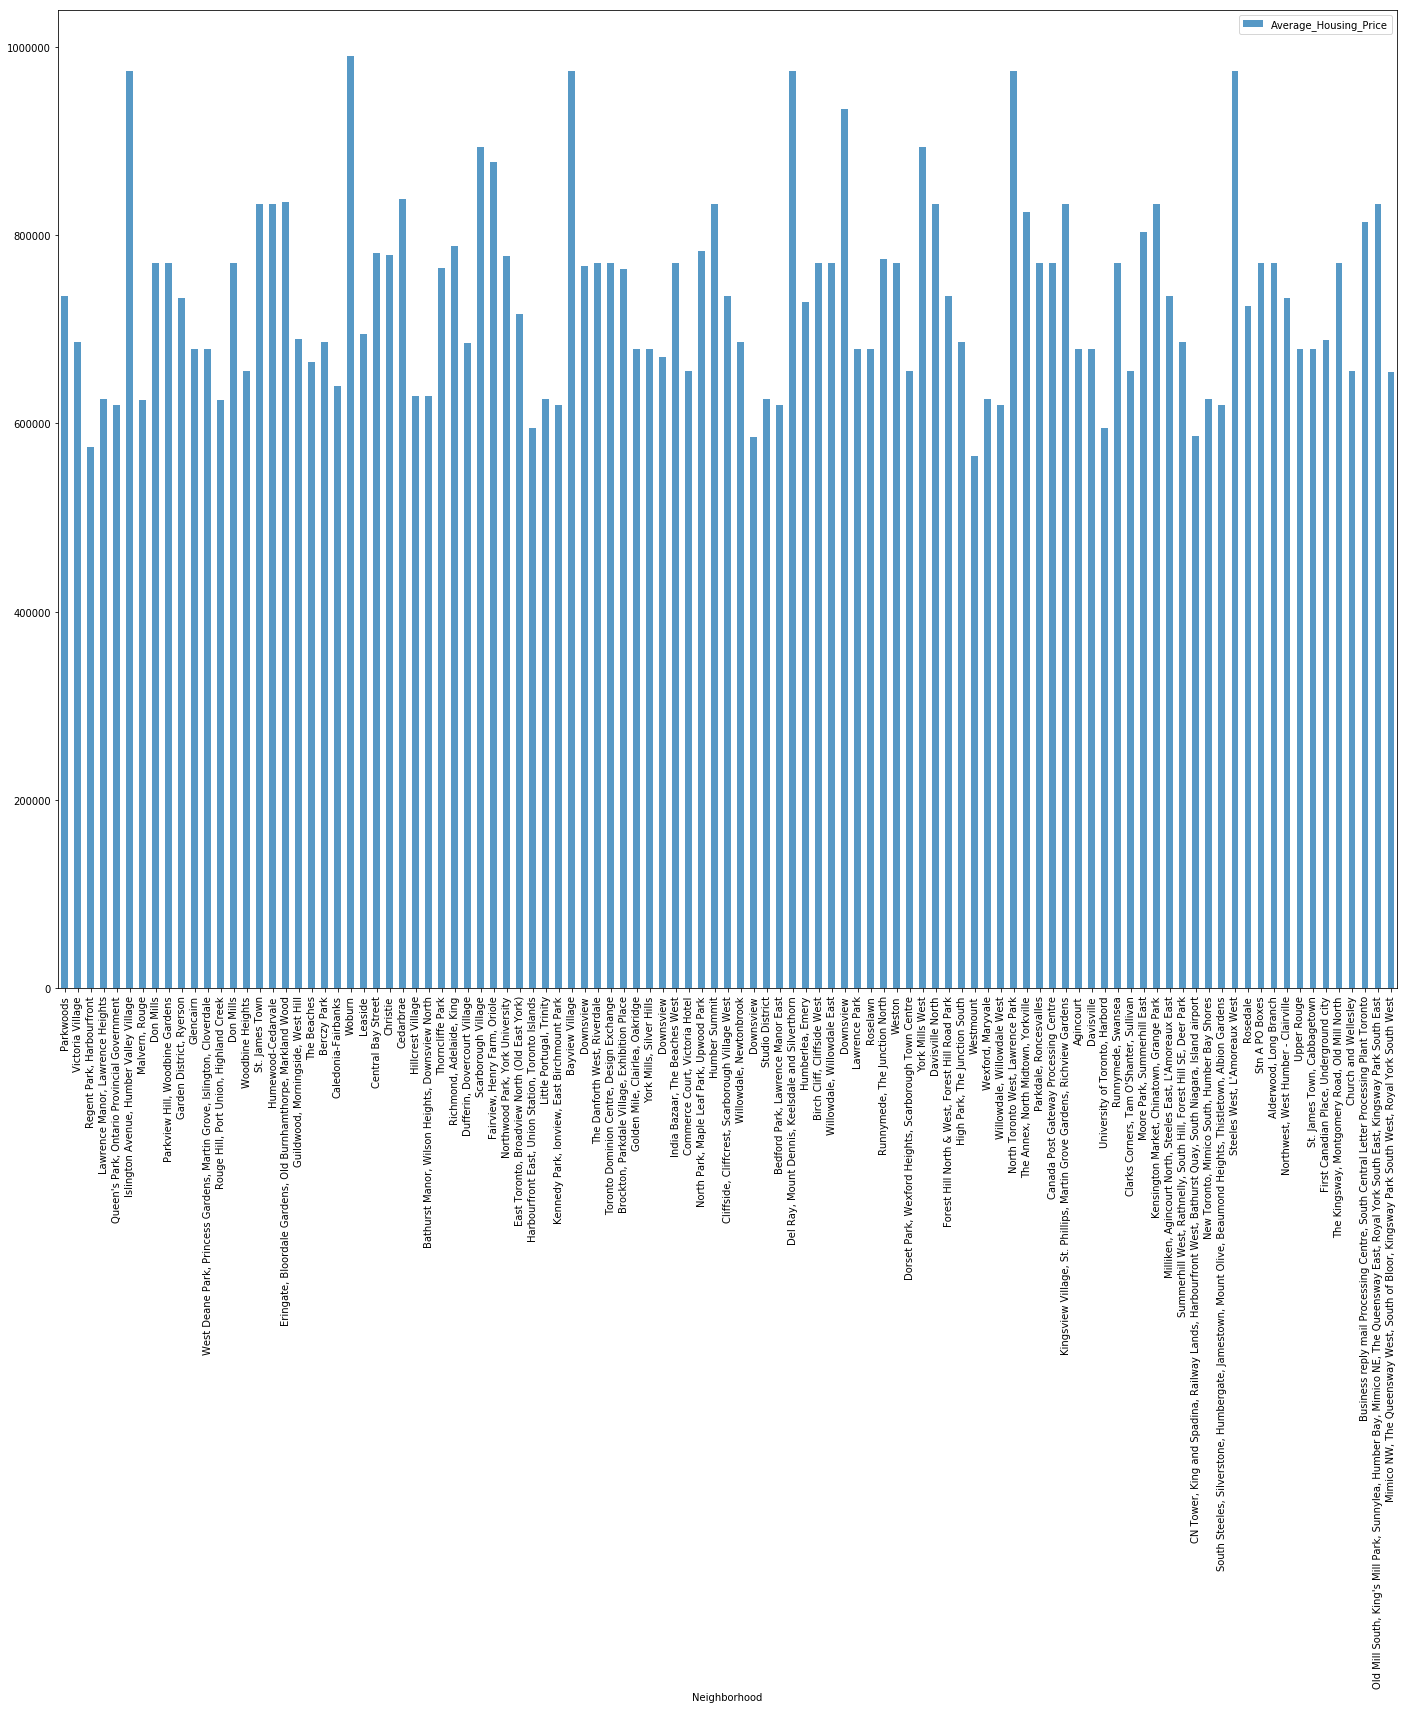

In [103]:
Toronto_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)


In [115]:
clusters=pd.DataFrame({"Cluster1":df1["Neighbourhood"],
                      "Cluster2":df2["Neighbourhood"],
                      "Cluster4":df3["Neighbourhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [116]:
new_Toronto=Toronto_merged.set_index("Neighbourhood",drop=True)
#Source:https://www.greatschools.org
Toronto_school_ratings=pd.DataFrame({"Neighbourhood":dfclean2["Neighbourhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})


In [118]:
Toronto_school_ratings.set_index('Neighbourhood',inplace=True,drop=True)


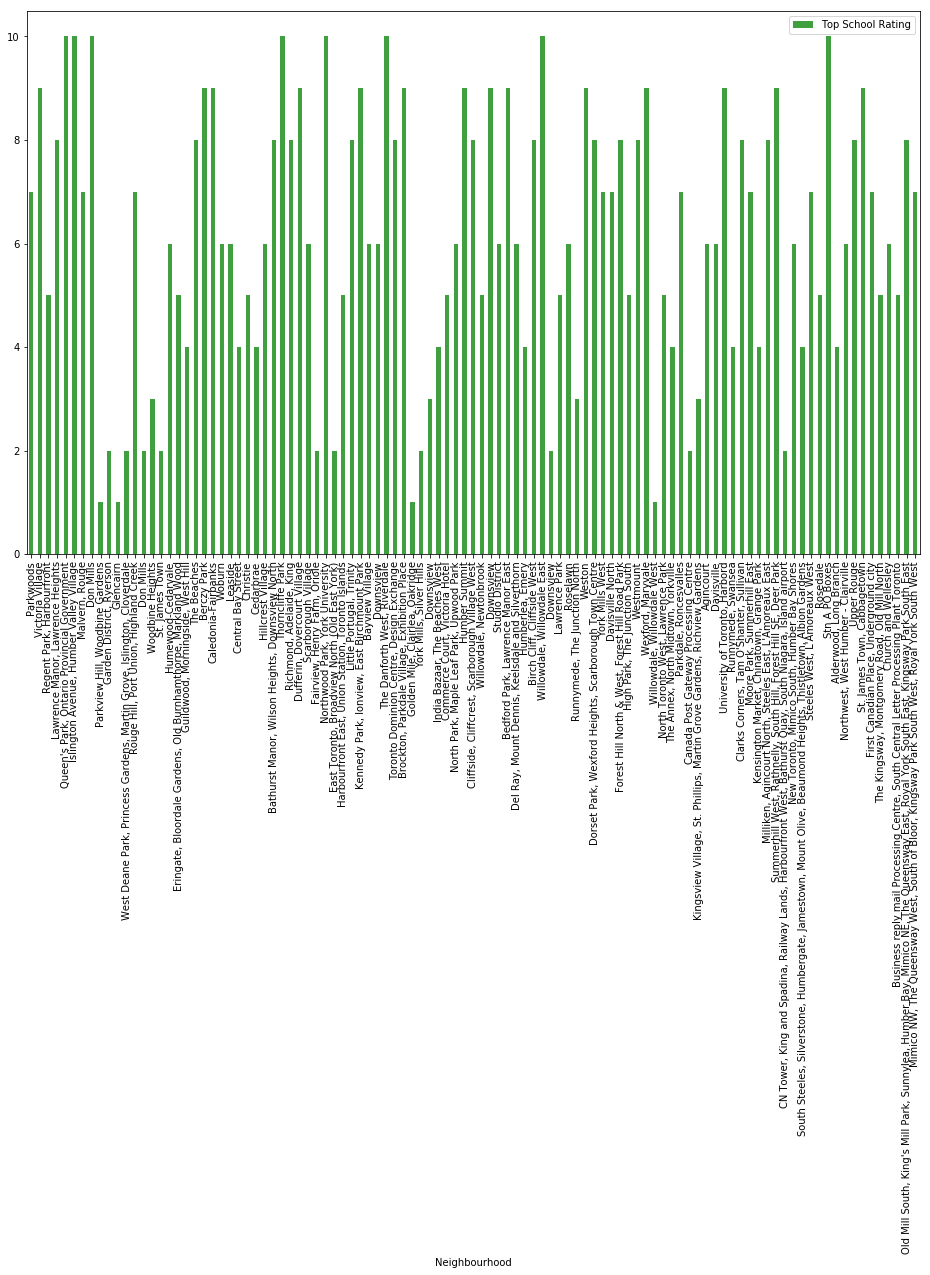

In [119]:
Toronto_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);
